In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("00_files/17_googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  str    
 1   Category        10841 non-null  str    
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  str    
 4   Size            10841 non-null  str    
 5   Installs        10841 non-null  str    
 6   Type            10840 non-null  str    
 7   Price           10841 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10841 non-null  str    
 10  Last Updated    10841 non-null  str    
 11  Current Ver     10833 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), str(12)
memory usage: 1.1 MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
## missing data

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df["Reviews"].str.isnumeric().sum()

np.int64(10840)

In [9]:
df[~df["Reviews"].str.isnumeric()] # select rows where the "Reviews" column contains non-numeric values (~)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df_clean = df.copy()

In [11]:
df_clean = df_clean.drop(df_clean.index[10472])

In [12]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  str    
 1   Category        10840 non-null  str    
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  str    
 4   Size            10840 non-null  str    
 5   Installs        10840 non-null  str    
 6   Type            10839 non-null  str    
 7   Price           10840 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10840 non-null  str    
 10  Last Updated    10840 non-null  str    
 11  Current Ver     10832 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), str(12)
memory usage: 1.2 MB


In [13]:
df_clean["Reviews"] = df_clean["Reviews"].astype(int) # convert the "Reviews" column from string to integer type

In [14]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  str    
 1   Category        10840 non-null  str    
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  str    
 5   Installs        10840 non-null  str    
 6   Type            10839 non-null  str    
 7   Price           10840 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10840 non-null  str    
 10  Last Updated    10840 non-null  str    
 11  Current Ver     10832 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), int64(1), str(11)
memory usage: 1.2 MB


In [15]:
df_clean.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [16]:
df_clean["Size"].unique()

<StringArray>
[  '19M',   '14M',  '8.7M',   '25M',  '2.8M',  '5.6M',   '29M',   '33M',
  '3.1M',   '28M',
 ...
  '467k',  '157k',   '44k',  '676k',   '67k',  '552k',  '885k', '1020k',
  '582k',  '619k']
Length: 461, dtype: str

In [17]:
df_clean["Size"] = df_clean["Size"].str.replace("M", "000")
df_clean["Size"] = df_clean["Size"].str.replace("k", "")
df_clean["Size"] = df_clean["Size"].replace("Varies with device", np.nan)

In [18]:
df_clean["Size"].unique()

<StringArray>
[ '19000',  '14000', '8.7000',  '25000', '2.8000', '5.6000',  '29000',
  '33000', '3.1000',  '28000',
 ...
    '467',    '157',     '44',    '676',     '67',    '552',    '885',
   '1020',    '582',    '619']
Length: 461, dtype: str

In [19]:
df_clean["Size"] = df_clean["Size"].astype(float)

In [20]:
df_clean['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [21]:
df_clean["Installs"].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [22]:
df_clean["Installs"].unique()

<StringArray>
[       '10,000+',       '500,000+',     '5,000,000+',    '50,000,000+',
       '100,000+',        '50,000+',     '1,000,000+',    '10,000,000+',
         '5,000+',   '100,000,000+', '1,000,000,000+',         '1,000+',
   '500,000,000+',            '50+',           '100+',           '500+',
            '10+',             '1+',             '5+',             '0+',
              '0']
Length: 21, dtype: str

In [23]:
df_clean["Price"].unique()

<StringArray>
[      '0',   '$4.99',   '$3.99',   '$6.99',   '$1.49',   '$2.99',   '$7.99',
   '$5.99',   '$3.49',   '$1.99',   '$9.99',   '$7.49',   '$0.99',   '$9.00',
   '$5.49',  '$10.00',  '$24.99',  '$11.99',  '$79.99',  '$16.99',  '$14.99',
   '$1.00',  '$29.99',  '$12.99',   '$2.49',  '$10.99',   '$1.50',  '$19.99',
  '$15.99',  '$33.99',  '$74.99',  '$39.99',   '$3.95',   '$4.49',   '$1.70',
   '$8.99',   '$2.00',   '$3.88',  '$25.99', '$399.99',  '$17.99', '$400.00',
   '$3.02',   '$1.76',   '$4.84',   '$4.77',   '$1.61',   '$2.50',   '$1.59',
   '$6.49',   '$1.29',   '$5.00',  '$13.99', '$299.99', '$379.99',  '$37.99',
  '$18.99', '$389.99',  '$19.90',   '$8.49',   '$1.75',  '$14.00',   '$4.85',
  '$46.99', '$109.99', '$154.99',   '$3.08',   '$2.59',   '$4.80',   '$1.96',
  '$19.40',   '$3.90',   '$4.59',  '$15.46',   '$3.04',   '$4.29',   '$2.60',
   '$3.28',   '$4.60',  '$28.99',   '$2.95',   '$2.90',   '$1.97', '$200.00',
  '$89.99',   '$2.56',  '$30.99',   '$3.61', '$394

In [24]:
chars_to_remove = ["+",",","$"]
cols_to_clean = ["Installs", "Price"]

In [25]:
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_clean[cols] = df_clean[cols].str.replace(item,"")

In [26]:
df_clean["Price"].unique()

<StringArray>
[     '0',   '4.99',   '3.99',   '6.99',   '1.49',   '2.99',   '7.99',
   '5.99',   '3.49',   '1.99',   '9.99',   '7.49',   '0.99',   '9.00',
   '5.49',  '10.00',  '24.99',  '11.99',  '79.99',  '16.99',  '14.99',
   '1.00',  '29.99',  '12.99',   '2.49',  '10.99',   '1.50',  '19.99',
  '15.99',  '33.99',  '74.99',  '39.99',   '3.95',   '4.49',   '1.70',
   '8.99',   '2.00',   '3.88',  '25.99', '399.99',  '17.99', '400.00',
   '3.02',   '1.76',   '4.84',   '4.77',   '1.61',   '2.50',   '1.59',
   '6.49',   '1.29',   '5.00',  '13.99', '299.99', '379.99',  '37.99',
  '18.99', '389.99',  '19.90',   '8.49',   '1.75',  '14.00',   '4.85',
  '46.99', '109.99', '154.99',   '3.08',   '2.59',   '4.80',   '1.96',
  '19.40',   '3.90',   '4.59',  '15.46',   '3.04',   '4.29',   '2.60',
   '3.28',   '4.60',  '28.99',   '2.95',   '2.90',   '1.97', '200.00',
  '89.99',   '2.56',  '30.99',   '3.61', '394.99',   '1.26',   '1.20',
   '1.04']
Length: 92, dtype: str

In [27]:
df_clean["Installs"].unique()

<StringArray>
[     '10000',     '500000',    '5000000',   '50000000',     '100000',
      '50000',    '1000000',   '10000000',       '5000',  '100000000',
 '1000000000',       '1000',  '500000000',         '50',        '100',
        '500',         '10',          '1',          '5',          '0']
Length: 20, dtype: str

In [28]:
df_clean["Price"] = df_clean["Price"].astype(float)

In [29]:
df_clean["Installs"] = df_clean["Installs"].astype(int)

In [30]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  str    
 1   Category        10840 non-null  str    
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  str    
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  str    
 9   Genres          10840 non-null  str    
 10  Last Updated    10840 non-null  str    
 11  Current Ver     10832 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(3), int64(2), str(8)
memory usage: 1.2 MB


In [31]:
df_clean.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [32]:
df_clean["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: str

In [33]:
df_clean["Last Updated"] = pd.to_datetime(df_clean["Last Updated"])

In [34]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [35]:
# create separate columns for easier time-based analysis
df_clean["Day"] = df_clean["Last Updated"].dt.day
df_clean["Month"] = df_clean["Last Updated"].dt.month
df_clean["Year"] = df_clean["Last Updated"].dt.year

In [36]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [37]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  str           
 1   Category        10840 non-null  str           
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  str           
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  str           
 9   Genres          10840 non-null  str           
 10  Last Updated    10840 non-null  datetime64[us]
 11  Current Ver     10832 non-null  str           
 12  Android Ver     10838 non-null  str           
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year            10

In [38]:
# EDA

In [39]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [40]:
df_clean[df_clean.duplicated("App")].shape

(1181, 16)

In [41]:
df_clean = df_clean.drop_duplicates(subset=["App"], keep="first")

In [42]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   str           
 1   Category        9659 non-null   str           
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   str           
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   str           
 9   Genres          9659 non-null   str           
 10  Last Updated    9659 non-null   datetime64[us]
 11  Current Ver     9651 non-null   str           
 12  Android Ver     9657 non-null   str           
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year            965

In [43]:
df_clean.shape

(9659, 16)

In [44]:
numeric_features = df_clean.select_dtypes(include='number').columns.tolist()
categorical_features = df_clean.select_dtypes(exclude='number').columns.tolist()

In [45]:
print(numeric_features)

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']


In [46]:
print(categorical_features)

['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


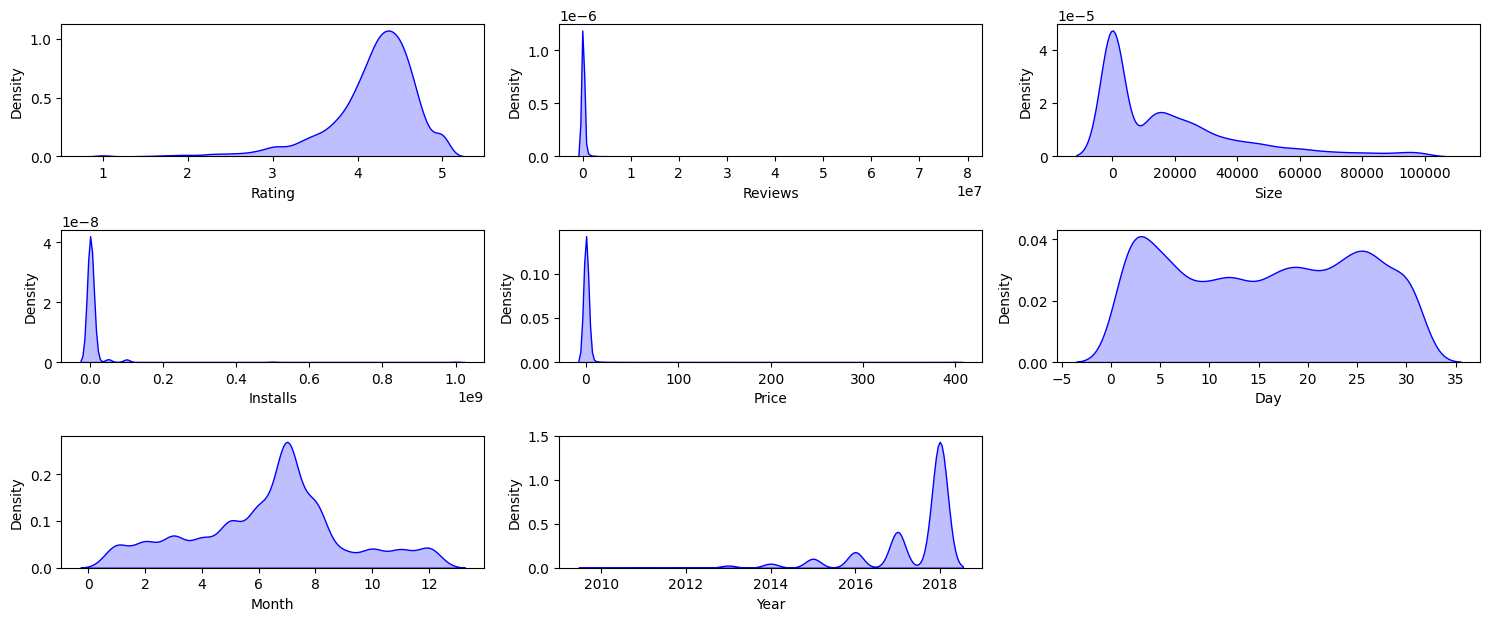

In [47]:
plt.figure(figsize=(15,10))

for i in range(0, len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_clean[numeric_features[i]], color ="b", fill=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

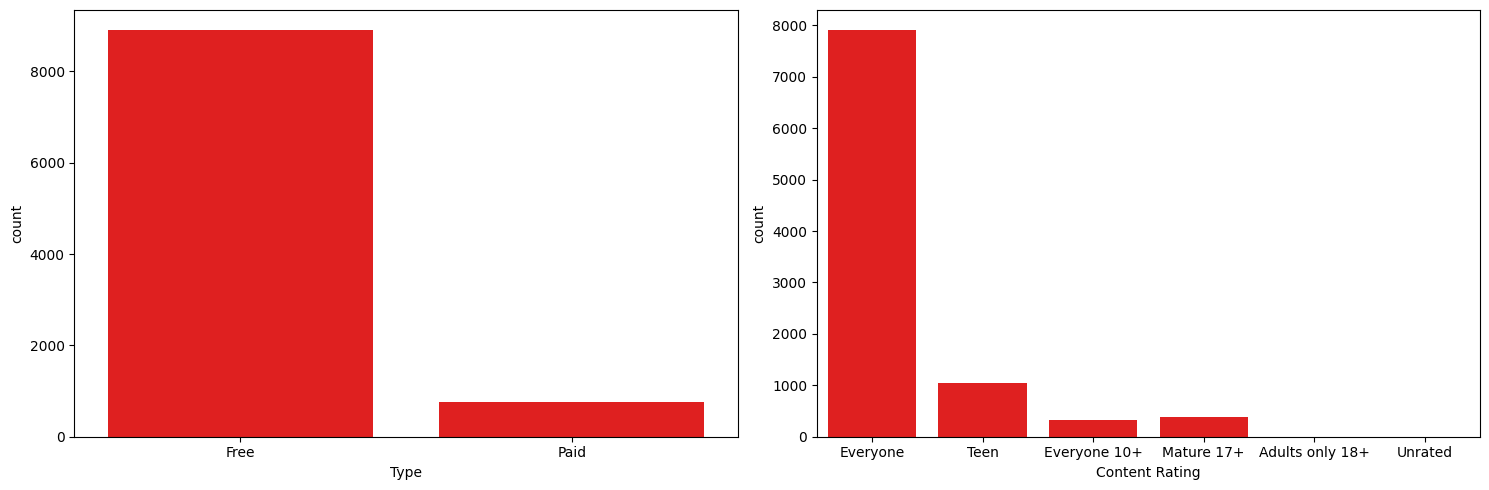

In [48]:
plt.figure(figsize=(15,5))

category = ["Type", "Content Rating"]

for i in range(0, len(category)):
    plt.subplot(1,2,i+1)
    sns.countplot(x=df_clean[category[i]], color ="r", fill=True)
    plt.xlabel(category[i])
    plt.tight_layout()
plt.show()

In [49]:
df_clean["Category"].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [50]:
# top app categories by installment

In [51]:
df_cat_installs = df_clean.groupby(["Category"])["Installs"].sum().sort_values(ascending = False).reset_index()

In [52]:
df_cat_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [53]:
df_cat_installs["Installs"] = df_cat_installs["Installs"]/1000000000

In [54]:
df_cat_installs

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


In [55]:
# top 10 categories by install

In [56]:
df2 = df_cat_installs.head(10)

In [57]:
df2

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


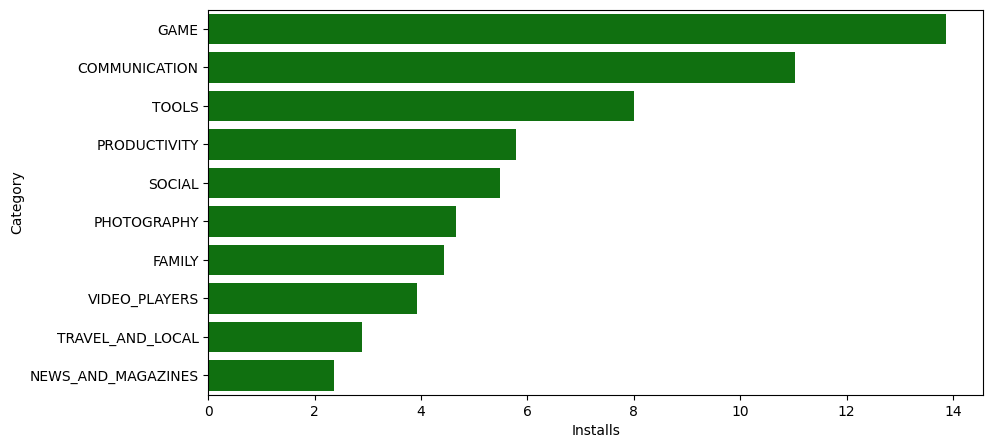

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x ="Installs", y = "Category", color = "g", data=df2)
plt.show()

In [59]:
# top 5 app in categories

In [60]:
apps = ["GAME", "COMMUNICATION", "TOOLS", "PRODUCTIVITY", "SOCIAL"] 

In [61]:
df_app_category = df_clean.groupby(["Category", "App"])["Installs"].sum().reset_index()

In [62]:
df_app_category = df_app_category.sort_values("Installs", ascending=False)

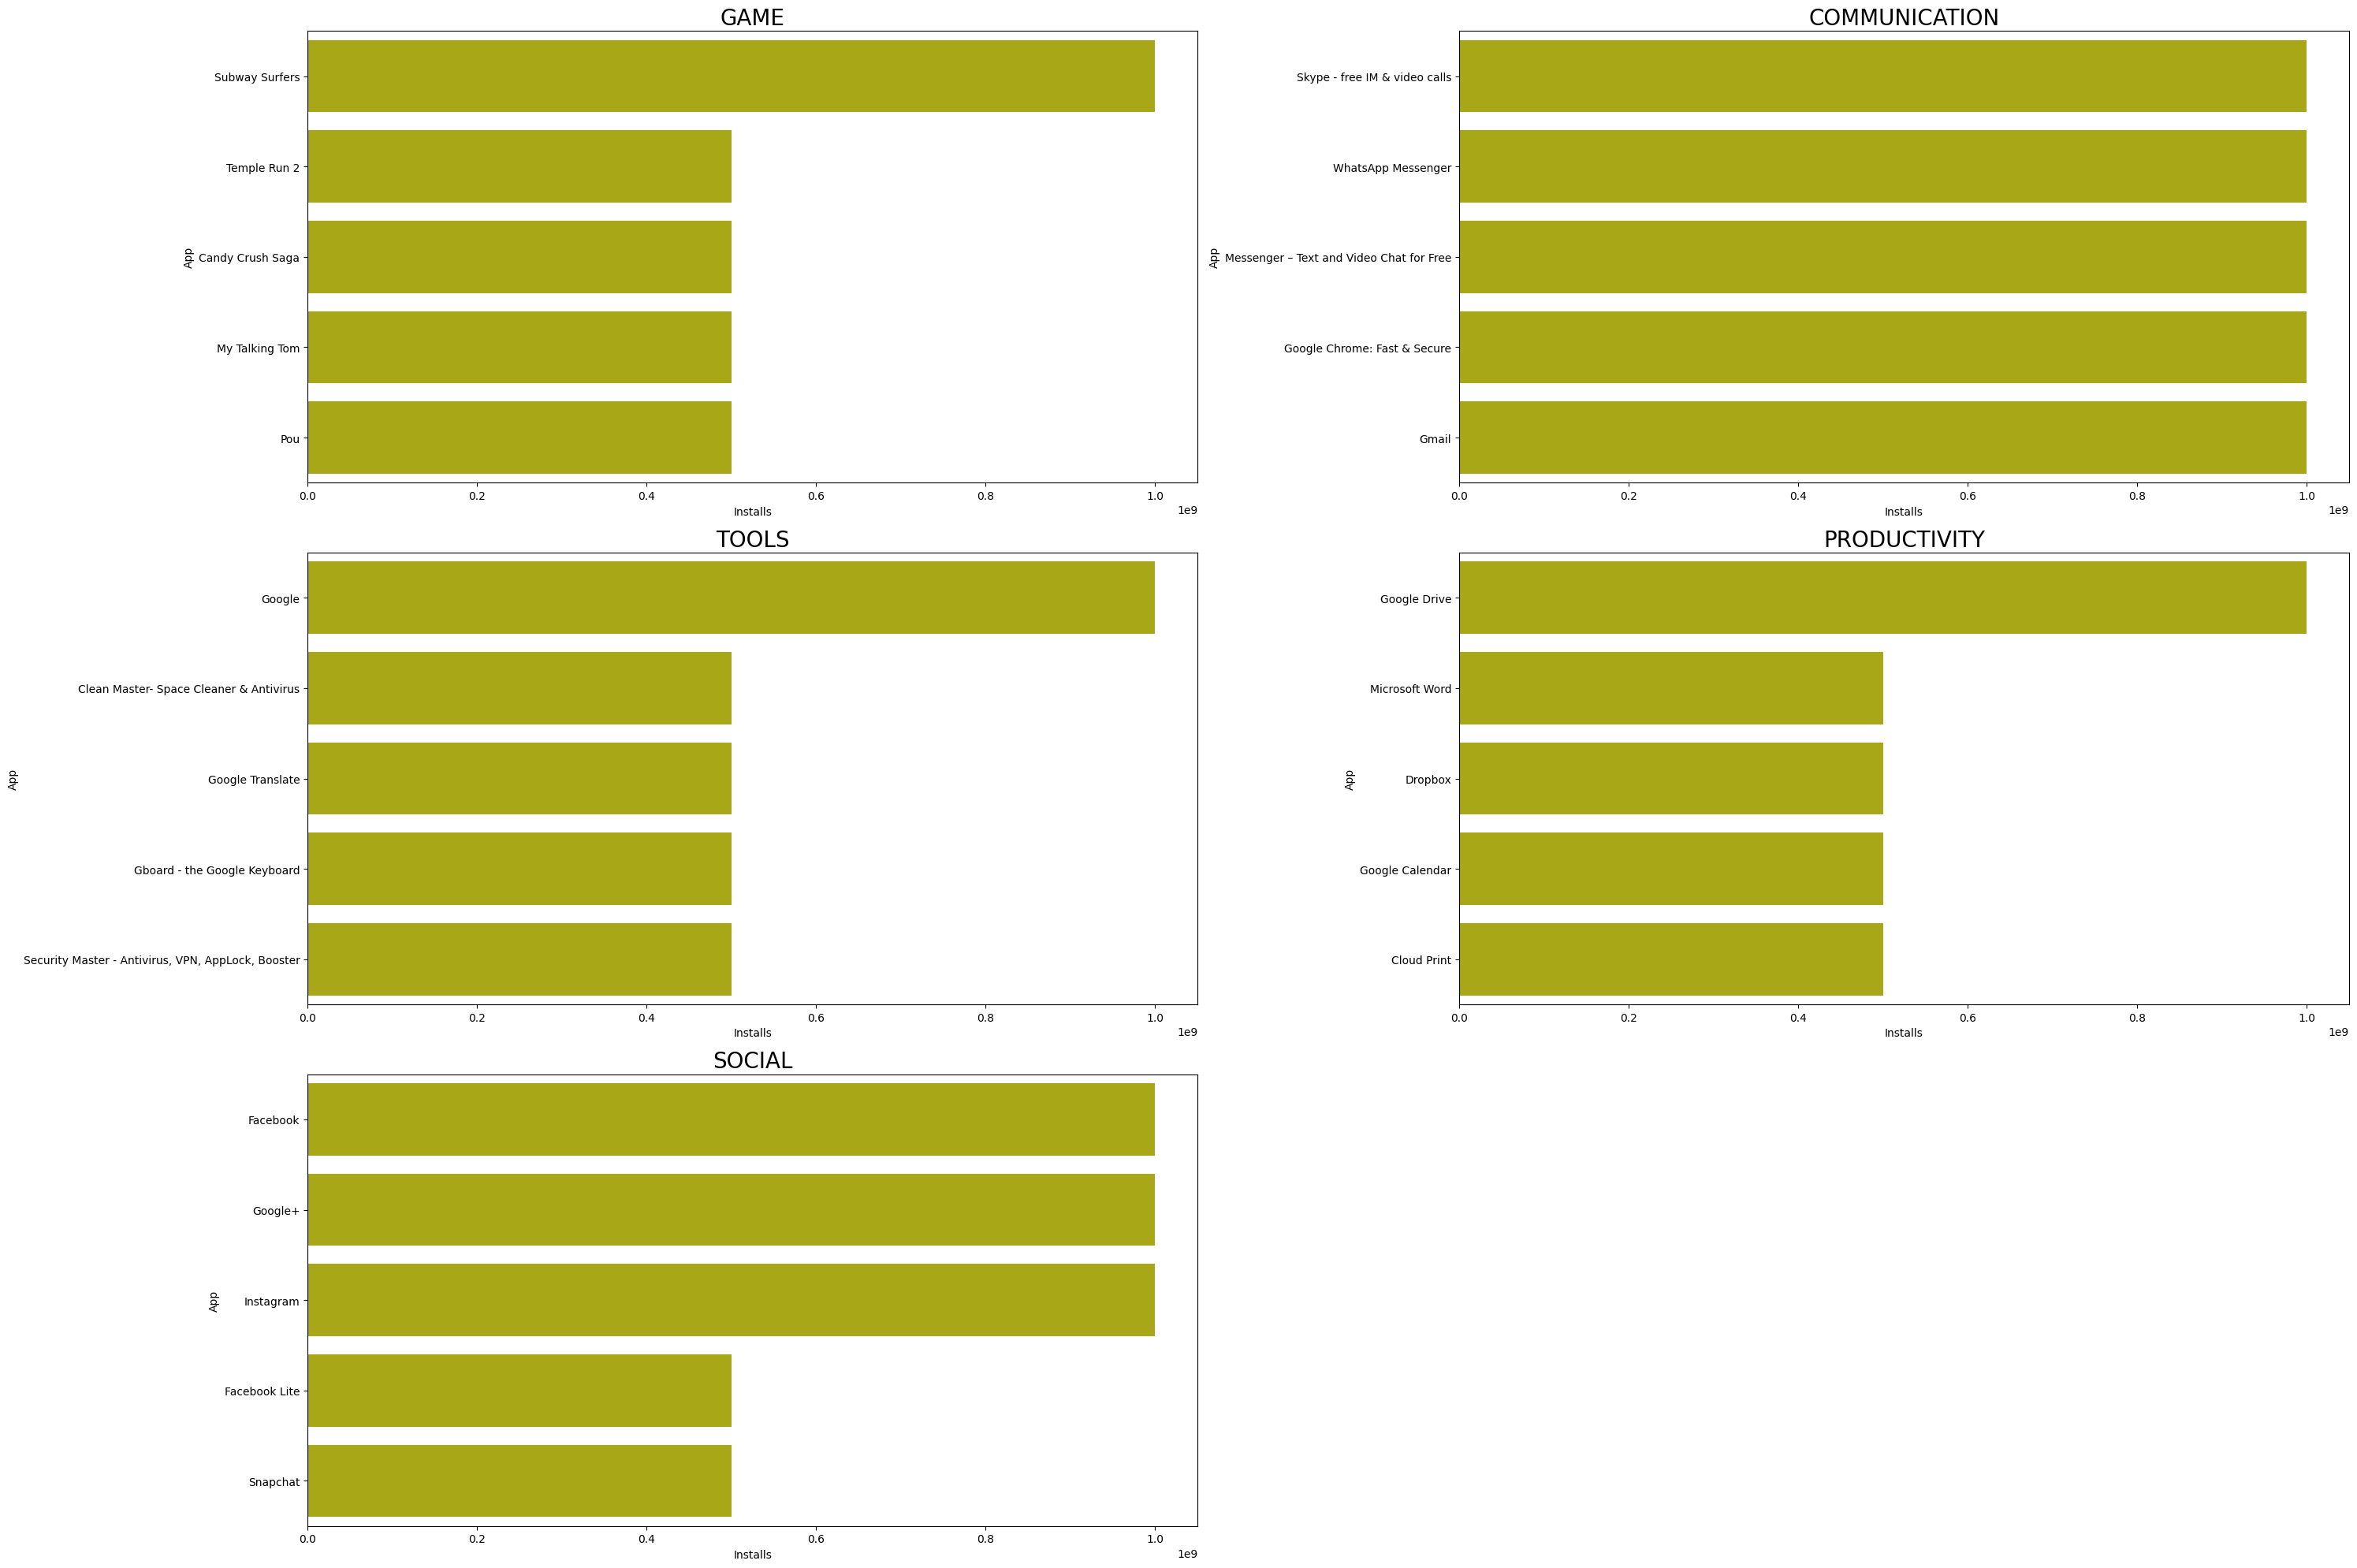

In [63]:
plt.figure(figsize=(30,20))
for i, app in enumerate(apps):
    df2 = df_app_category[df_app_category.Category == app]
    df2 = df2.head(5)
    # print(df2)

    plt.subplot(3,2,i+1)
    sns.barplot(data=df2, x= "Installs", y="App", color="y")
    plt.title(app, size=20)
    plt.tight_layout()
plt.show()

In [64]:
# 5 rating apps

In [65]:
rating_df = df_clean.groupby(["Category", "Installs", "App"])["Rating"].sum().sort_values(ascending=False).reset_index()

In [66]:
top_rated_apps = rating_df[rating_df["Rating"] == 5.0]

In [67]:
top_rated_apps.shape

(271, 4)

In [68]:
df_clean["Android Ver"] = df_clean["Android Ver"].replace("and up", "", regex=True).replace("W", "", regex = True).replace("", np.nan)
df_clean["Android Ver"] = df_clean["Android Ver"].replace("Varies with device", "", regex=True)

In [69]:
df_clean["Android Ver"].unique()

<StringArray>
[       '4.0.3 ',          '4.2 ',          '4.4 ',          '2.3 ',
          '3.0 ',          '4.1 ',          '4.0 ',        '2.3.3 ',
              '',          '2.2 ',          '5.0 ',          '6.0 ',
          '1.6 ',          '1.5 ',          '2.1 ',          '7.0 ',
          '5.1 ',          '4.3 ', '4.0.3 - 7.1.1',          '2.0 ',
          '3.2 ',          '7.1 ',   '7.0 - 7.1.1',          '8.0 ',
     '5.0 - 8.0',          '3.1 ',        '2.0.1 ',   '4.1 - 7.1.1',
             nan,     '5.0 - 6.0',          '1.0 ',   '2.2 - 7.1.1',
   '5.0 - 7.1.1']
Length: 33, dtype: str

In [70]:
df_clean[df_clean["Android Ver"].str.contains("-") == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
350,Web Browser & Explorer,COMMUNICATION,4.0,36901,6.6,5000000,Free,0.0,Everyone,Communication,2018-07-04,11.8.6,4.0.3 - 7.1.1,4,7,2018
352,Browser 4G,COMMUNICATION,4.3,192948,6.6,10000000,Free,0.0,Everyone,Communication,2018-06-19,24.6.6,4.0.3 - 7.1.1,19,6,2018
1572,ZenUI Safeguard,LIFESTYLE,4.5,100,7.1,1000000,Free,0.0,Everyone,Lifestyle,2018-05-09,1.0.0.21_180410,7.0 - 7.1.1,9,5,2018
2841,Photo Collage - Layout Editor,PHOTOGRAPHY,4.5,285788,46000.0,10000000,Free,0.0,Everyone,Photography,2017-12-04,1.8.0.170824_9,5.0 - 8.0,4,12,2017
3474,ASUS Quick Memo,PRODUCTIVITY,4.5,23089,1.6,10000000,Free,0.0,Everyone,Productivity,2018-04-11,1.10.0.33_180403,5.0 - 8.0,11,4,2018
4151,Google Now Launcher,TOOLS,4.2,857215,7.9,100000000,Free,0.0,Everyone,Tools,2017-12-07,1.4.large,4.1 - 7.1.1,7,12,2017
7571,My Style CM 13 Theme,PERSONALIZATION,4.5,314,11000.0,10000,Free,0.0,Everyone,Personalization,2016-09-08,1.9,5.0 - 6.0,8,9,2016
9310,EF Jumper,GAME,NaN,4,5.1,100,Free,0.0,Everyone,Arcade,2017-07-13,Build 12,2.2 - 7.1.1,13,7,2017
10094,EY Catalyst Reader,BUSINESS,NaN,1,8.4,5,Free,0.0,Everyone,Business,2018-04-10,1.2.1,5.0 - 7.1.1,10,4,2018


In [71]:
df_clean = df_clean[df_clean["Android Ver"].str.contains("-") == False]

In [72]:
df_clean["Android Ver"].value_counts()

Android Ver
4.1       2202
4.0.3     1395
4.0       1285
           990
4.4        829
2.3        616
5.0        512
4.2        372
2.3.3      273
2.2        239
3.0        231
4.3        221
2.1        133
1.6        116
6.0         54
7.0         42
3.2         36
2.0         32
5.1         22
1.5         20
3.1         10
2.0.1        7
8.0          6
7.1          3
1.0          2
Name: count, dtype: int64

In [73]:
# encoding example

In [74]:
mean_genre_installs = mean_genre_installs = df_clean.groupby(["Genres",])["Installs"].mean()/1000000

In [75]:
mean_genre_installs

Genres
Action                                   11.648961
Action;Action & Adventure                 4.418375
Adventure                                 4.064319
Adventure;Action & Adventure             21.230000
Adventure;Brain Games                     0.100000
                                           ...    
Video Players & Editors                  24.178412
Video Players & Editors;Creativity        5.000000
Video Players & Editors;Music & Video     7.500000
Weather                                   4.570893
Word                                      7.355328
Name: Installs, Length: 118, dtype: float64

In [76]:
df_clean["Genres Encoded"] = df_clean["Genres"].map(mean_genre_installs)

In [77]:
df_clean["Genres Encoded"]

0        1.974177
1        0.500000
2        1.974177
3        1.974177
4        0.285000
           ...   
10836    0.506687
10837    0.506687
10838    0.096692
10839    7.504367
10840    1.342843
Name: Genres Encoded, Length: 9650, dtype: float64